In [2]:
#import data from csv file

import pandas as pd

dataset = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\Main_rows_and_Subrows_without_missing_values_in_main.csv')
#select rows where hash is notna
main_rows = dataset[dataset['hash'].notna()]

# Data for All Issue Types

In [33]:
#values

# Smell diffs
code_smells_diff = main_rows['code_smells_diff']

# Smell diffs
code_smells_density = main_rows['code_smell_density'].apply(lambda x: float(x))

#loc
added_lines = main_rows['added_lines']
deleted_lines = main_rows['deleted_lines']

#jira issue key
jira_issue_key = main_rows['jira issue key']


In [6]:
len(main_rows)

358

## Shapiro-Wilk test for Normality

In [30]:
#Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Define the Shapiro-Wilk test function
def shapiro_wilk_test(values):
    stat, p = shapiro(values)
    print(f'Statistic={stat:.2f}, p-value={p:.2f}')
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Perform the Shapiro-Wilk test

print('Code Smells Diff:')
shapiro_wilk_test(code_smells_diff)

print('Added Lines:')
shapiro_wilk_test(added_lines)

print('Deleted Lines:')
shapiro_wilk_test(deleted_lines)



Code Smells Diff:
Statistic=0.11, p-value=0.00
Data does not look normally distributed (reject H0)
Added Lines:
Statistic=0.26, p-value=0.00
Data does not look normally distributed (reject H0)
Deleted Lines:
Statistic=0.10, p-value=0.00
Data does not look normally distributed (reject H0)


In [34]:
print('Code Smells Density:')
shapiro_wilk_test(code_smells_density)

Code Smells Density:
Statistic=0.34, p-value=0.00
Data does not look normally distributed (reject H0)


In [32]:
#print row where code_smells_diff is #DIV/0!
main_rows[main_rows['code_smells_diff'] == '#DIV/0!']


,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,issue type,...,file_new_path,jira issue key,summary,issue type.1,status,resolution,code_smells,code_smells_diff,code_smell_density,Main Row


# Spearman Rank Corr for All Issue Types

In [37]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

result_01 = spearmanr(code_smells_diff, added_lines)
result_02 = spearmanr(code_smells_diff, deleted_lines)

result_03 = spearmanr(code_smells_density, added_lines)
result_04 = spearmanr(code_smells_density, deleted_lines)

print('Code smells Diff and Added lines for All Issues:' +  ' Correlation: '+ str(result_01.statistic) + ' p value:' + str(result_01.pvalue))
print('Code smells Diff and Deleted lines for All Issues:' +  ' Correlation: '+ str(result_02.statistic) + ' p value:' + str(result_02.pvalue))
print('Code smells Density and Added lines for All Issues:' +  ' Correlation: '+ str(result_03.statistic) + ' p value:' + str(result_03.pvalue))
print('Code smells Density and Deleted lines for All Issues:' +  ' Correlation: '+ str(result_04.statistic) + ' p value:' + str(result_04.pvalue))

Code smells Diff and Added lines for All Issues: Correlation: 0.2104733037085559 p value:5.983475741706626e-05
Code smells Diff and Deleted lines for All Issues: Correlation: -0.14441378596220855 p value:0.006195636665348922
Code smells Density and Added lines for All Issues: Correlation: 0.15512415423442874 p value:0.003254111380407547
Code smells Density and Deleted lines for All Issues: Correlation: -0.1959583020437129 p value:0.00019074133703783454


# Data for Different Issue Types

In [39]:
#main rows for different issue types

#filter rows with issue type = 'Bug'
main_rows_bug = main_rows[main_rows['issue type'] == 'Bug']

#filter rows with issue type = 'New Feature'
main_rows_feature = main_rows[main_rows['issue type'] == 'New Feature']

#filter rows with issue type = 'Improvement'
main_rows_improvement = main_rows[main_rows['issue type'] == 'Improvement']

#filter rows with issue type = 'Test'
main_rows_test = main_rows[main_rows['issue type'] == 'Test']

#filter rows with issue type = 'Wish'
main_rows_wish = main_rows[main_rows['issue type'] == 'Wish']

#filter rows with issue type = 'Task'
main_rows_task = main_rows[main_rows['issue type'] == 'Task']

#filter rows with issue type = 'Sub-task'
main_rows_subtask = main_rows[main_rows['issue type'] == 'Sub-task']


## Bug Issue Type

In [41]:
#data for 'Bug'issue type

#added lines in main rows
added_lines_bug = main_rows_bug['added_lines']

#deleted lines in main rows
deleted_lines_bug = main_rows_bug['deleted_lines']

#code smells in main rows
code_smells_bug = main_rows_bug['code_smells']

#code smells diff in main rows
code_smells_diff_bug = main_rows_bug['code_smells_diff']

#code smells density in main rows
code_smells_density_bug = main_rows_bug['code_smell_density'].apply(lambda x: float(x))

## New Feature

In [42]:
#data for 'New feature' issue type

#added lines in main rows
added_lines_feature = main_rows_feature['added_lines']

#deleted lines in main rows
deleted_lines_feature = main_rows_feature['deleted_lines']

#code smells in main rows
code_smells_feature = main_rows_feature['code_smells']

#code smells diff in main rows
code_smells_diff_feature = main_rows_feature['code_smells_diff']

#code smells density in main rows
code_smells_density_feature = main_rows_feature['code_smell_density'].apply(lambda x: float(x))

## Improvement

In [43]:
#data for 'Improvement' issue type

#added lines in main rows
added_lines_improvement = main_rows_improvement['added_lines']

#deleted lines in main rows
deleted_lines_improvement = main_rows_improvement['deleted_lines']

#code smells in main rows
code_smells_improvement = main_rows_improvement['code_smells']

#code smells diff in main rows
code_smells_diff_improvement = main_rows_improvement['code_smells_diff']

#code smells density in main rows
code_smells_density_improvement = main_rows_improvement['code_smell_density'].apply(lambda x: float(x))

## Test

In [44]:
#data for 'Test' issue type

#added lines in main rows
added_lines_test = main_rows_test['added_lines']

#deleted lines in main rows
deleted_lines_test = main_rows_test['deleted_lines']

#code smells in main rows
code_smells_test = main_rows_test['code_smells']

#code smells diff in main rows
code_smells_diff_test = main_rows_test['code_smells_diff']

#code smells density in main rows
code_smells_density_test = main_rows_test['code_smell_density'].apply(lambda x: float(x))

## Wish

In [45]:
#data for 'Wish' issue type

#added lines in main rows
added_lines_wish = main_rows_wish['added_lines']

#deleted lines in main rows
deleted_lines_wish = main_rows_wish['deleted_lines']

#code smells in main rows
code_smells_wish = main_rows_wish['code_smells']

#code smells diff in main rows
code_smells_diff_wish = main_rows_wish['code_smells_diff']

#code smells density in main rows
code_smells_density_wish = main_rows_wish['code_smell_density'].apply(lambda x: float(x))

## Task

In [46]:
#data for 'Task' issue type

#added lines in main rows
added_lines_task = main_rows_task['added_lines']

#deleted lines in main rows
deleted_lines_task = main_rows_task['deleted_lines']

#code smells in main rows
code_smells_task = main_rows_task['code_smells']

#code smells diff in main rows
code_smells_diff_task = main_rows_task['code_smells_diff']

#code smells density in main rows
code_smells_density_task = main_rows_task['code_smell_density'].apply(lambda x: float(x))

## Sub Task

In [47]:
#data for 'Sub-task' issue type

#added lines in main rows
added_lines_subtask = main_rows_subtask['added_lines']

#deleted lines in main rows
deleted_lines_subtask = main_rows_subtask['deleted_lines']

#code smells in main rows
code_smells_subtask = main_rows_subtask['code_smells']

#code smells diff in main rows
code_smells_diff_subtask = main_rows_subtask['code_smells_diff']

#code smells density in main rows
code_smells_density_subtask = main_rows_subtask['code_smell_density'].apply(lambda x: float(x))

# Spearman Rank Correlation for Different Issue Types

## Bug Issue Type

In [48]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_bug, added_lines_bug)
print('Added lines and code smells diff for Bug Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_bug, deleted_lines_bug)
print('Deleted lines and code smells diff for Bug Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_bug, added_lines_bug)
print('Added lines and code smells density for Bug Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_bug, deleted_lines_bug)
print('Deleted lines and code smells density for Bug Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for Bug Issue Type: Correlation: 0.1303478862517247 p value:0.15071627646118707
Deleted lines and code smells diff for Bug Issue Type: Correlation: -0.0798290365096275 p value:0.38010170584971525
Added lines and code smells density for Bug Issue Type: Correlation: 0.050208104091182634 p value:0.5812928169805414
Deleted lines and code smells density for Bug Issue Type: Correlation: -0.1108793273494158 p value:0.22211480666217998


## New Feature Issue Type

In [49]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_feature, added_lines_feature)
print('Added lines and code smells diff for New Feature Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_feature, deleted_lines_feature)
print('Deleted lines and code smells diff for New Feature Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_feature, added_lines_feature)
print('Added lines and code smells density for New Feature Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_feature, deleted_lines_feature)
print('Deleted lines and code smells density for New Feature Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for New Feature Issue Type: Correlation: 0.494779409357656 p value:0.10197644557357327
Deleted lines and code smells diff for New Feature Issue Type: Correlation: -0.418840802520066 p value:0.17535918287410363
Added lines and code smells density for New Feature Issue Type: Correlation: 0.27762402420220994 p value:0.38230213467402174
Deleted lines and code smells density for New Feature Issue Type: Correlation: -0.25807943617160417 p value:0.4180101071450334


## Improvement 

In [57]:
added_lines_improvement.to_list()

[296,
 65,
 2,
 151,
 23,
 222,
 4,
 273,
 94,
 105,
 148,
 76,
 9,
 6,
 61,
 93,
 234,
 3,
 2069,
 10,
 55,
 502,
 14,
 28,
 64,
 66,
 1,
 0,
 160,
 11,
 14,
 71,
 19,
 491,
 111,
 51,
 166,
 259,
 37,
 9,
 1,
 203,
 19,
 50,
 703,
 36,
 3,
 17,
 2,
 20,
 633,
 260,
 2,
 713,
 713,
 2,
 23,
 48,
 8,
 2,
 124,
 0,
 116,
 2,
 2,
 380,
 7,
 27,
 43,
 6,
 6,
 147,
 13,
 4,
 480,
 233,
 110,
 2,
 5,
 2,
 255,
 3,
 43,
 36,
 275,
 206,
 1487,
 311,
 6,
 633,
 252,
 814,
 4099,
 153,
 7,
 5,
 37,
 2,
 226,
 3,
 9318,
 113,
 49,
 97,
 35,
 8,
 39,
 63,
 4,
 1,
 257,
 1,
 134,
 26,
 1,
 9]

In [50]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_improvement, added_lines_improvement)
print('Added lines and code smells diff for Improvement Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_improvement, deleted_lines_improvement)
print('Deleted lines and code smells diff for Improvement Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_improvement, added_lines_improvement)
print('Added lines and code smells density for Improvement Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_improvement, deleted_lines_improvement)
print('Deleted lines and code smells density for Improvement Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for Improvement Issue Type: Correlation: 0.36753341661133887 p value:4.937215652295608e-05
Deleted lines and code smells diff for Improvement Issue Type: Correlation: -0.054562671248041726 p value:0.5607502997986771
Added lines and code smells density for Improvement Issue Type: Correlation: 0.3301597792871094 p value:0.00029521512259922844
Deleted lines and code smells density for Improvement Issue Type: Correlation: -0.09542819894644959 p value:0.30820763091852216


## Test

In [51]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_test, added_lines_test)
print('Added lines and code smells diff for Test Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_test, deleted_lines_test)
print('Deleted lines and code smells diff for Test Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_test, added_lines_test)
print('Added lines and code smells density for Test Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_test, deleted_lines_test)
print('Deleted lines and code smells density for Test Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for Test Issue Type: Correlation: 0.5 p value:0.6666666666666667
Deleted lines and code smells diff for Test Issue Type: Correlation: -0.5 p value:0.6666666666666667
Added lines and code smells density for Test Issue Type: Correlation: -0.5 p value:0.6666666666666667
Deleted lines and code smells density for Test Issue Type: Correlation: 0.5 p value:0.6666666666666667


## Task

In [52]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_task, added_lines_task)
print('Added lines and code smells diff for Task Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_task, deleted_lines_task)
print('Deleted lines and code smells diff for Task Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_task, added_lines_task)
print('Added lines and code smells density for Task Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_task, deleted_lines_task)
print('Deleted lines and code smells density for Task Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for Task Issue Type: Correlation: -0.34871297161932646 p value:0.2027205220430182
Deleted lines and code smells diff for Task Issue Type: Correlation: -0.2960005456768702 p value:0.2840843527677446
Added lines and code smells density for Task Issue Type: Correlation: -0.16750765339503362 p value:0.5506986523791715
Deleted lines and code smells density for Task Issue Type: Correlation: -0.16548948889629828 p value:0.5555781164127105


## Sub-Task

In [53]:
#Spearman's correlation coefficient
from scipy.stats import spearmanr

# calculate spearman's correlation # add p value to the output.  
# is it the intermediate value

result_1 = spearmanr(code_smells_diff_subtask, added_lines_subtask)
print('Added lines and code smells diff for Sub-Task Issue Type:' +  ' Correlation: '+ str(result_1.statistic) + ' p value:' + str(result_1.pvalue))

result_2 = spearmanr(code_smells_diff_subtask, deleted_lines_subtask)
print('Deleted lines and code smells diff for Sub-Task Issue Type:' +  ' Correlation: '+ str(result_2.statistic) + ' p value:' + str(result_2.pvalue))

result_3 = spearmanr(code_smells_density_subtask, added_lines_subtask)
print('Added lines and code smells density for Sub-Task Issue Type:' +  ' Correlation: '+ str(result_3.statistic) + ' p value:' + str(result_3.pvalue))

result_4 = spearmanr(code_smells_density_subtask, deleted_lines_subtask)
print('Deleted lines and code smells density for Sub-Task Issue Type:' +  ' Correlation: '+ str(result_4.statistic) + ' p value:' + str(result_4.pvalue))


Added lines and code smells diff for Sub-Task Issue Type: Correlation: 0.21697866204059096 p value:0.04351967591875615
Deleted lines and code smells diff for Sub-Task Issue Type: Correlation: -0.17386955272525498 p value:0.10727045886246303
Added lines and code smells density for Sub-Task Issue Type: Correlation: 0.2363052004025727 p value:0.02755692739291175
Deleted lines and code smells density for Sub-Task Issue Type: Correlation: -0.21360192340538944 p value:0.04697563141405431


# Scatter Plots

In [58]:
#import matplotlib

import matplotlib.pyplot as plt

## All Commits

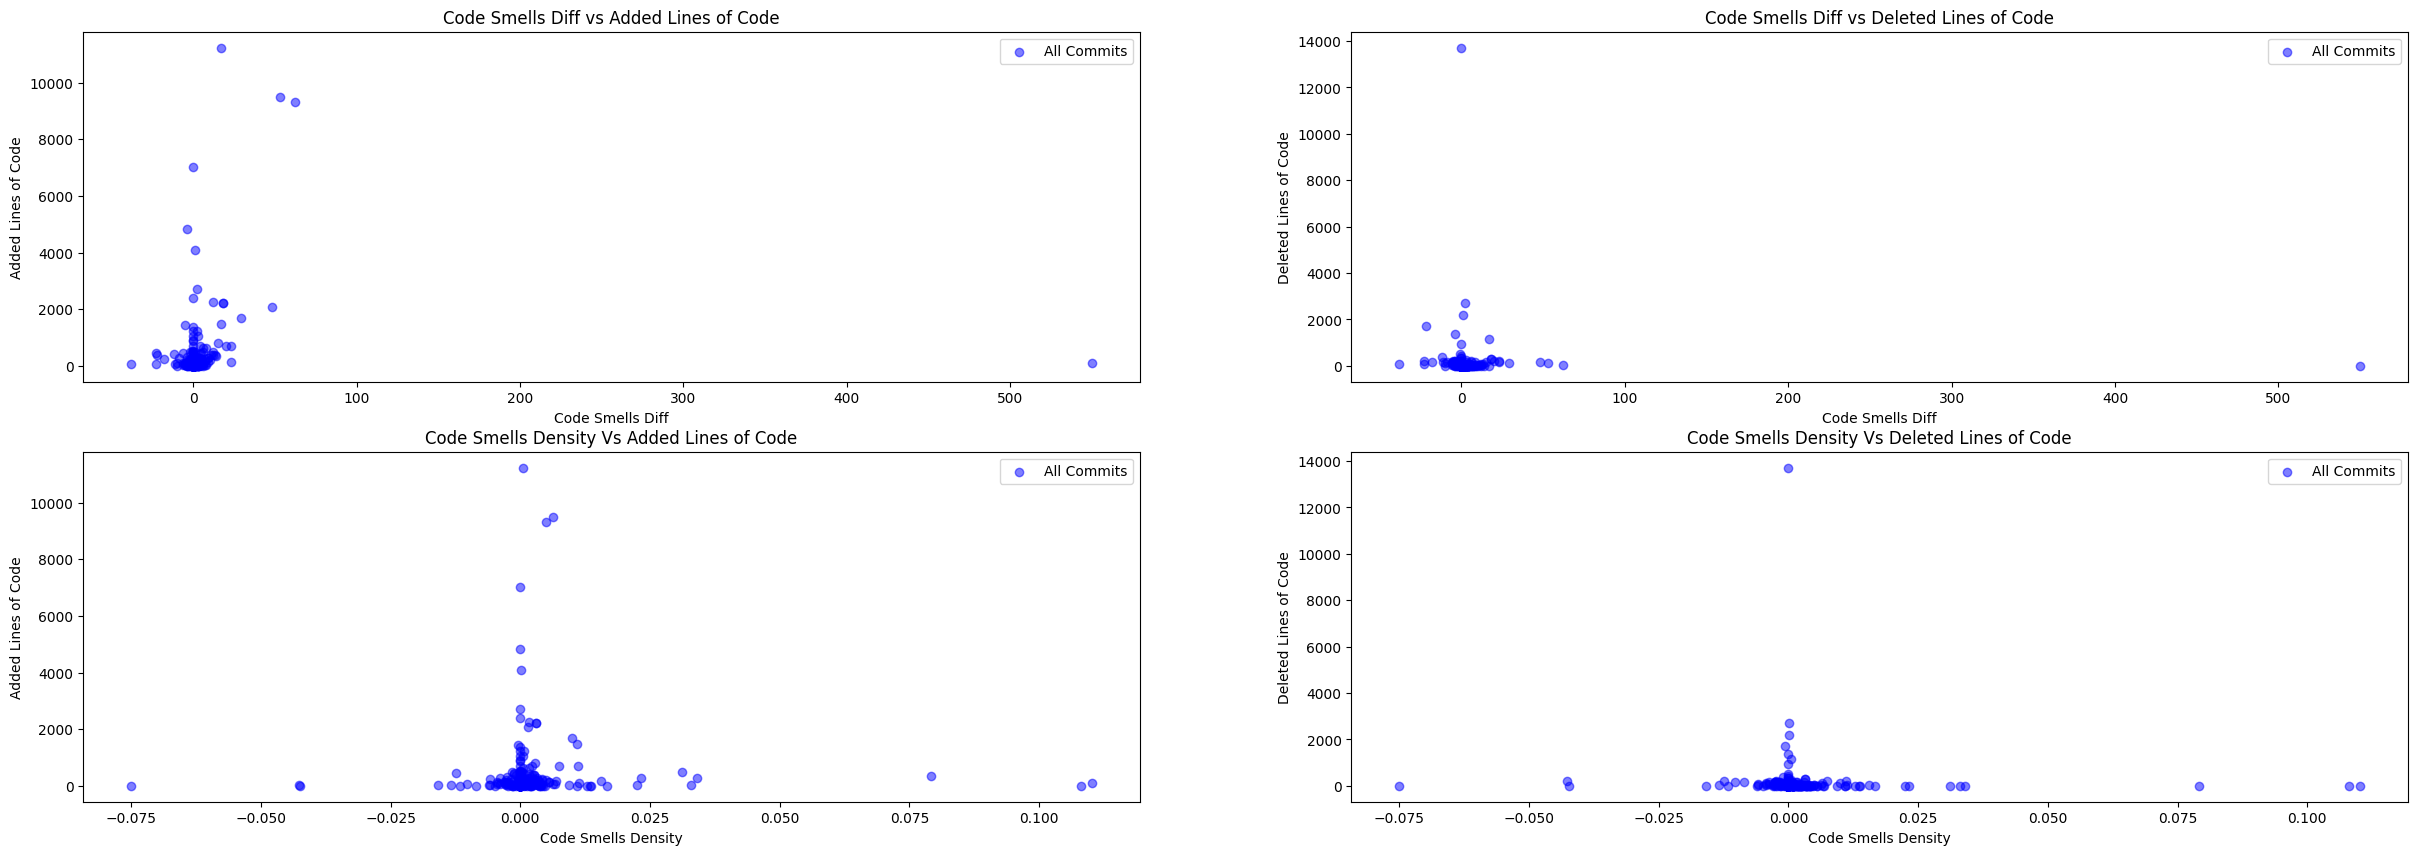

In [83]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


ax1.scatter(code_smells_diff, added_lines, c='blue', alpha=0.5, label='All Commits')

ax2.scatter(code_smells_diff, deleted_lines, c='blue', alpha=0.5, label='All Commits')

ax3.scatter(code_smells_density.apply(lambda x: float(x)), added_lines, c='blue', alpha=0.5, label='All Commits')

ax4.scatter(code_smells_density.apply(lambda x: float(x)), deleted_lines, c='blue', alpha=0.5, label='All Commits')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()

## Different Issue Types

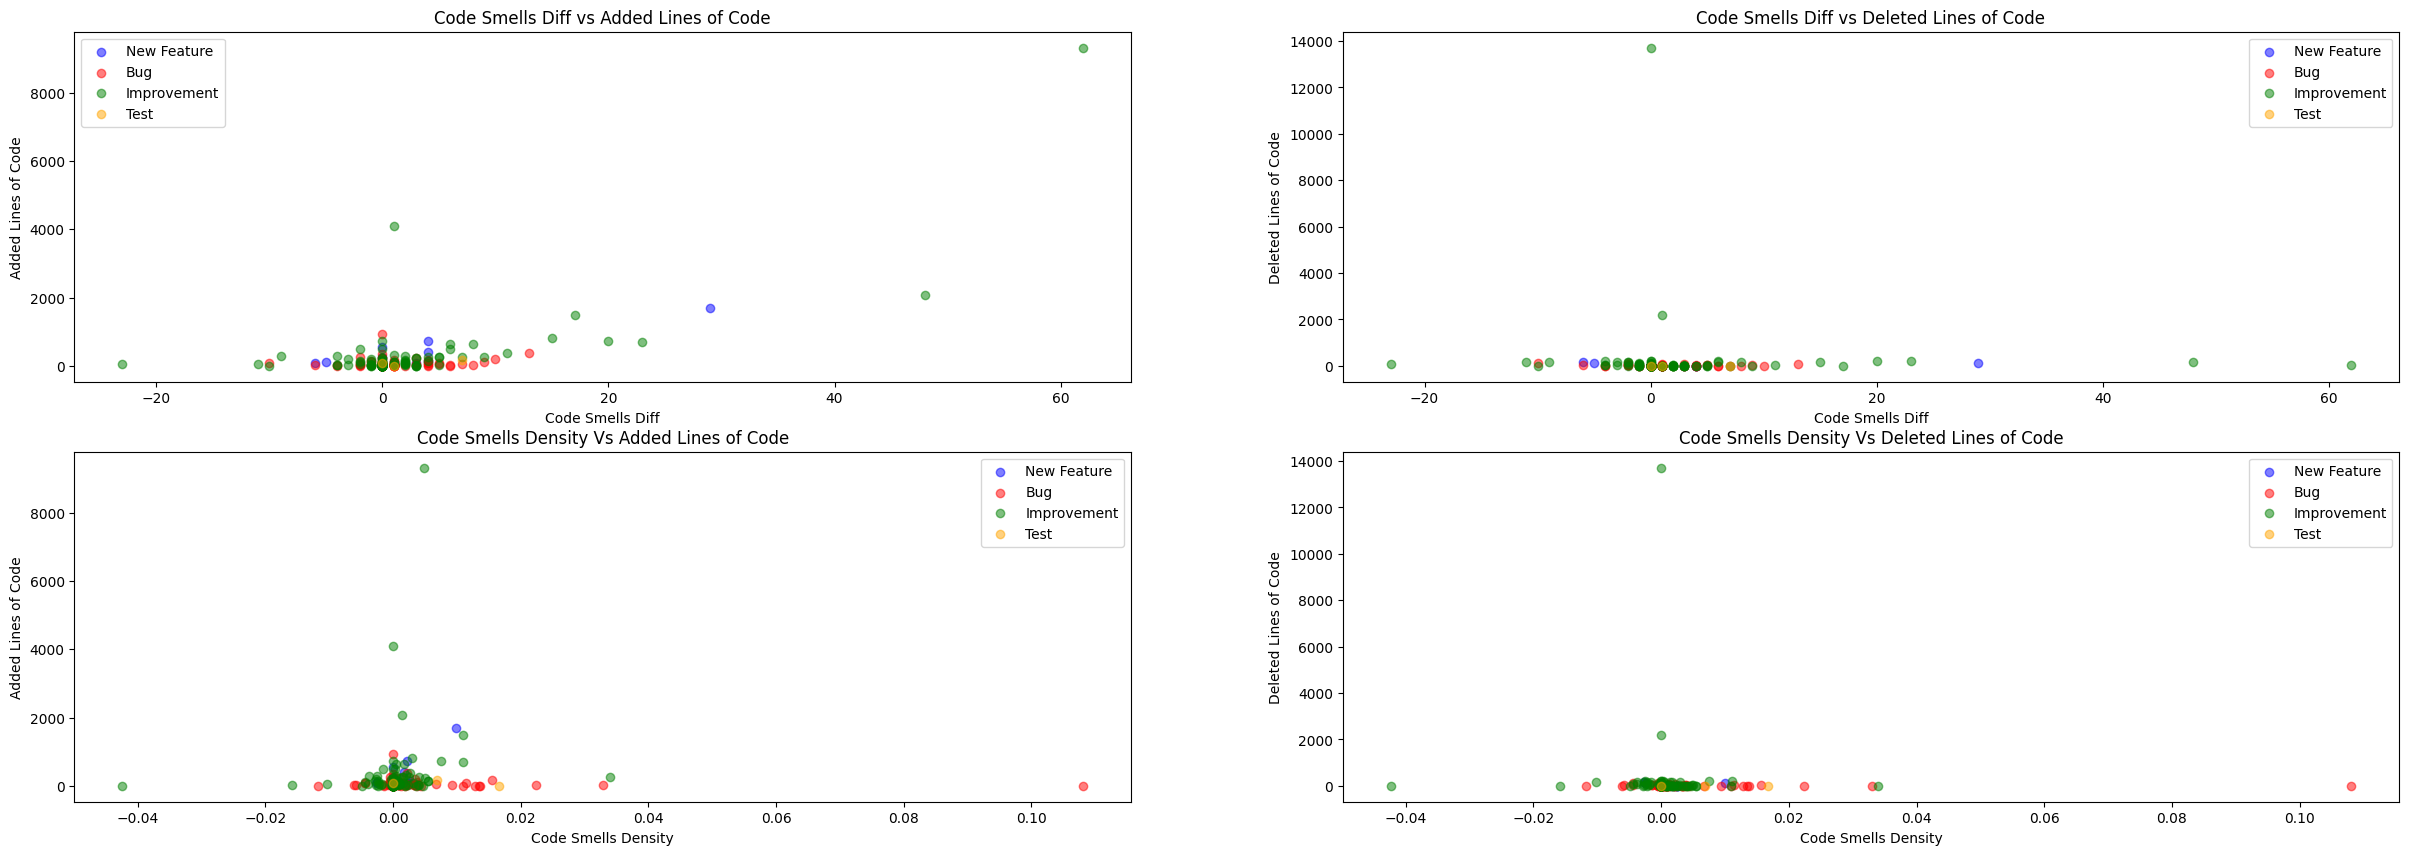

In [59]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()

## Feature

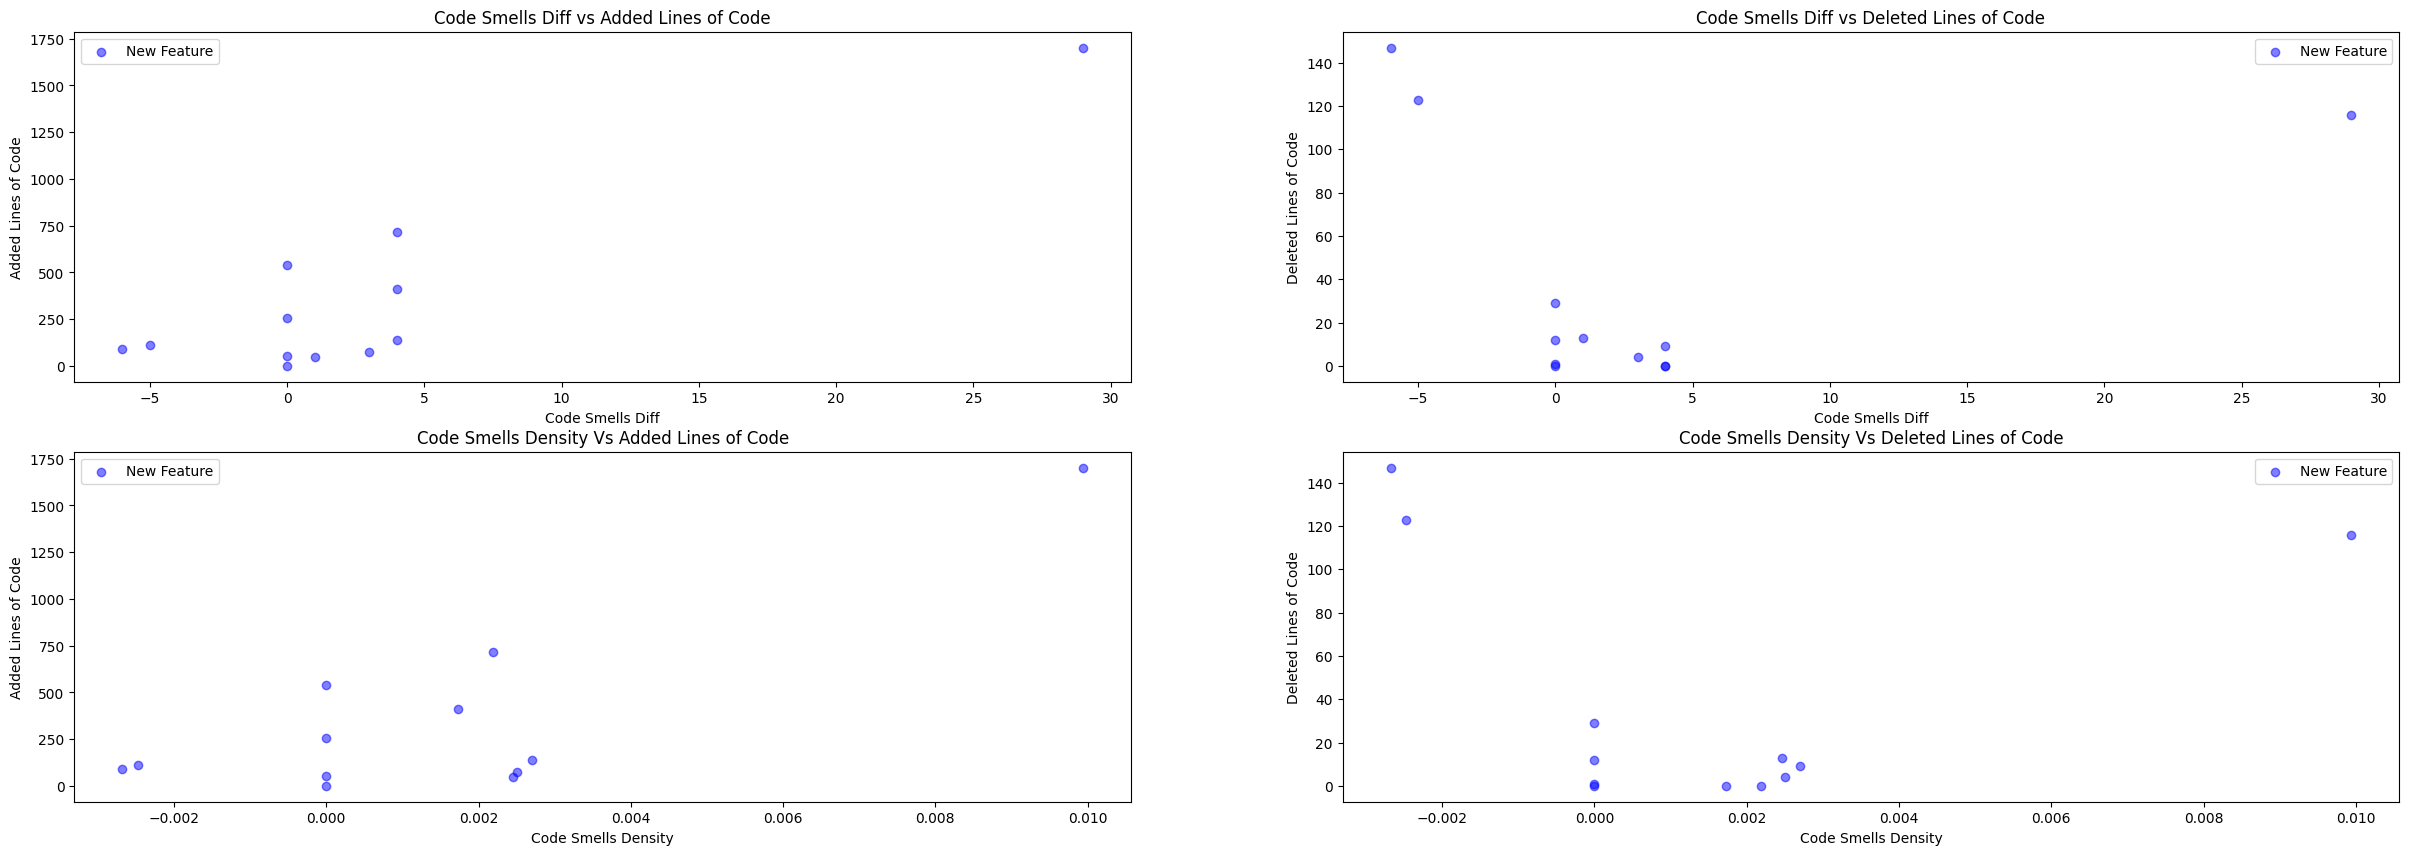

In [79]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()

## Bug

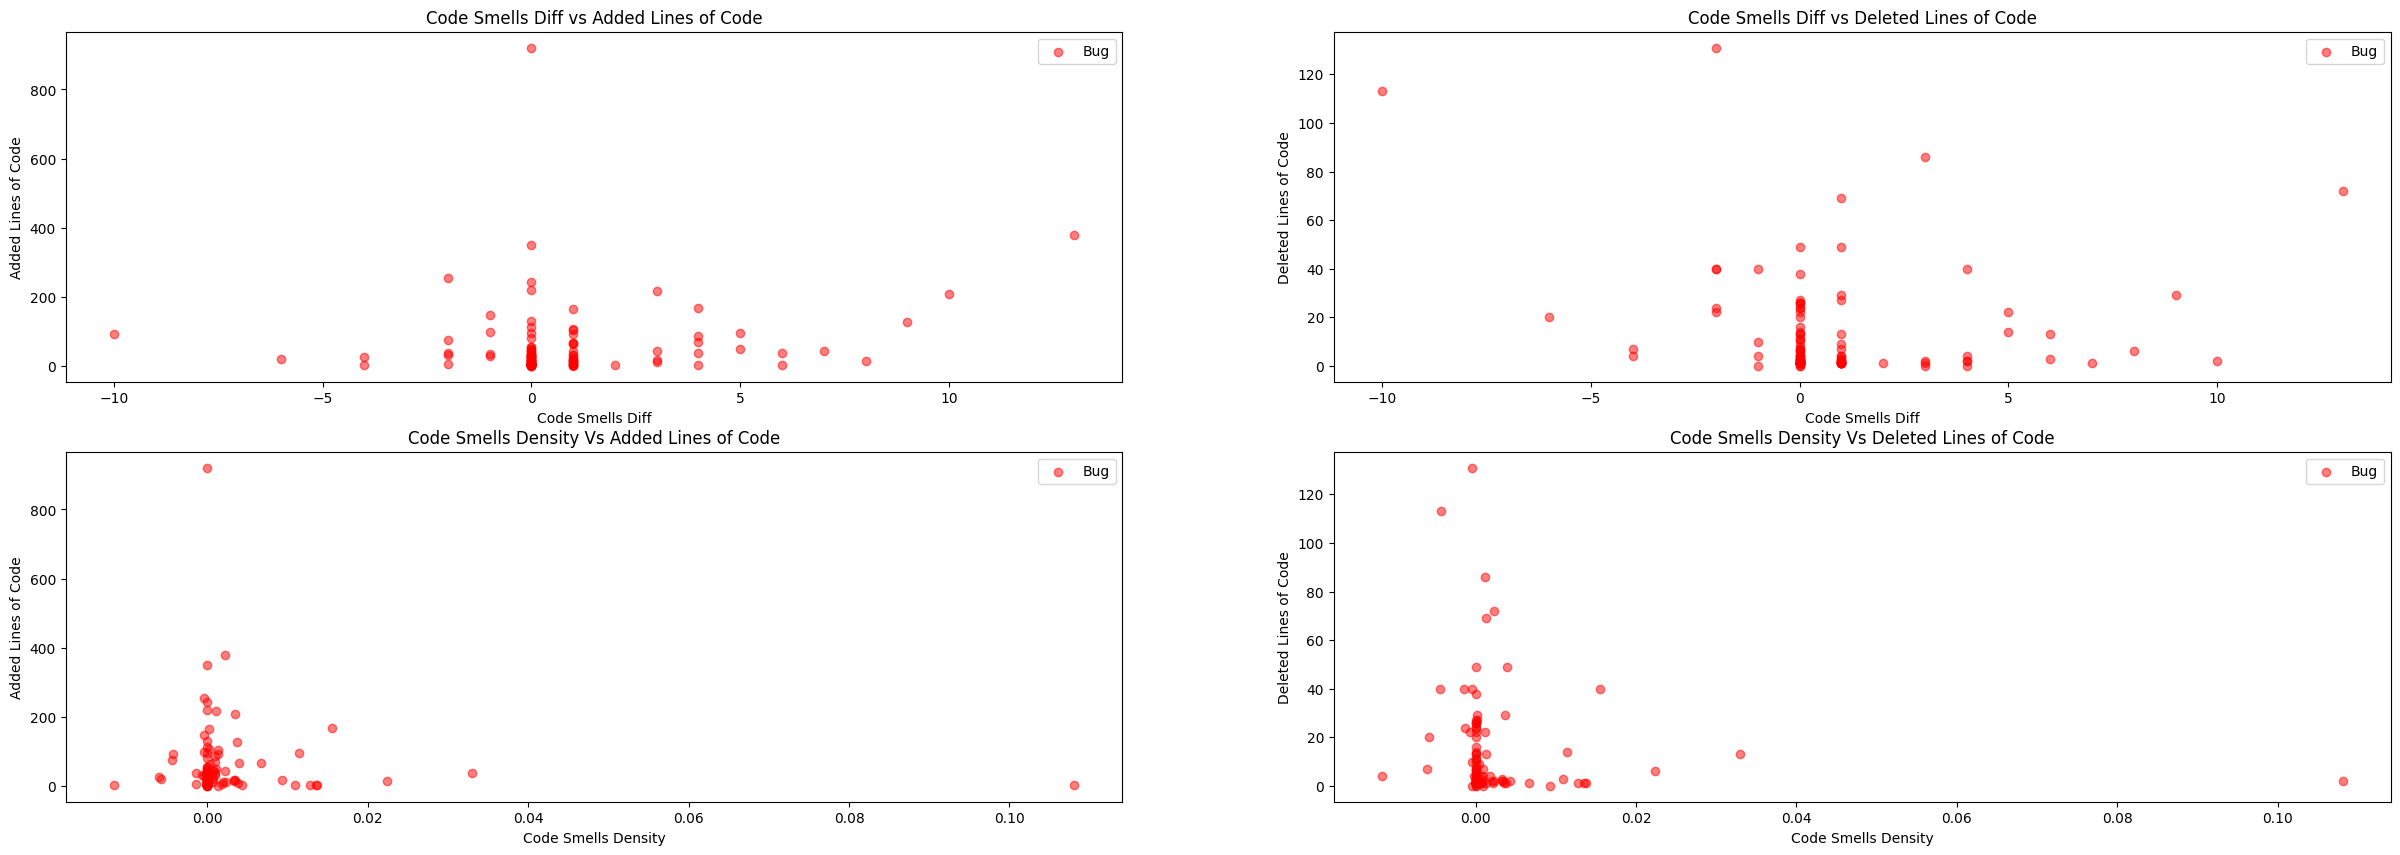

In [80]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


#ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

#ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

#ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

#ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()

## Improvement

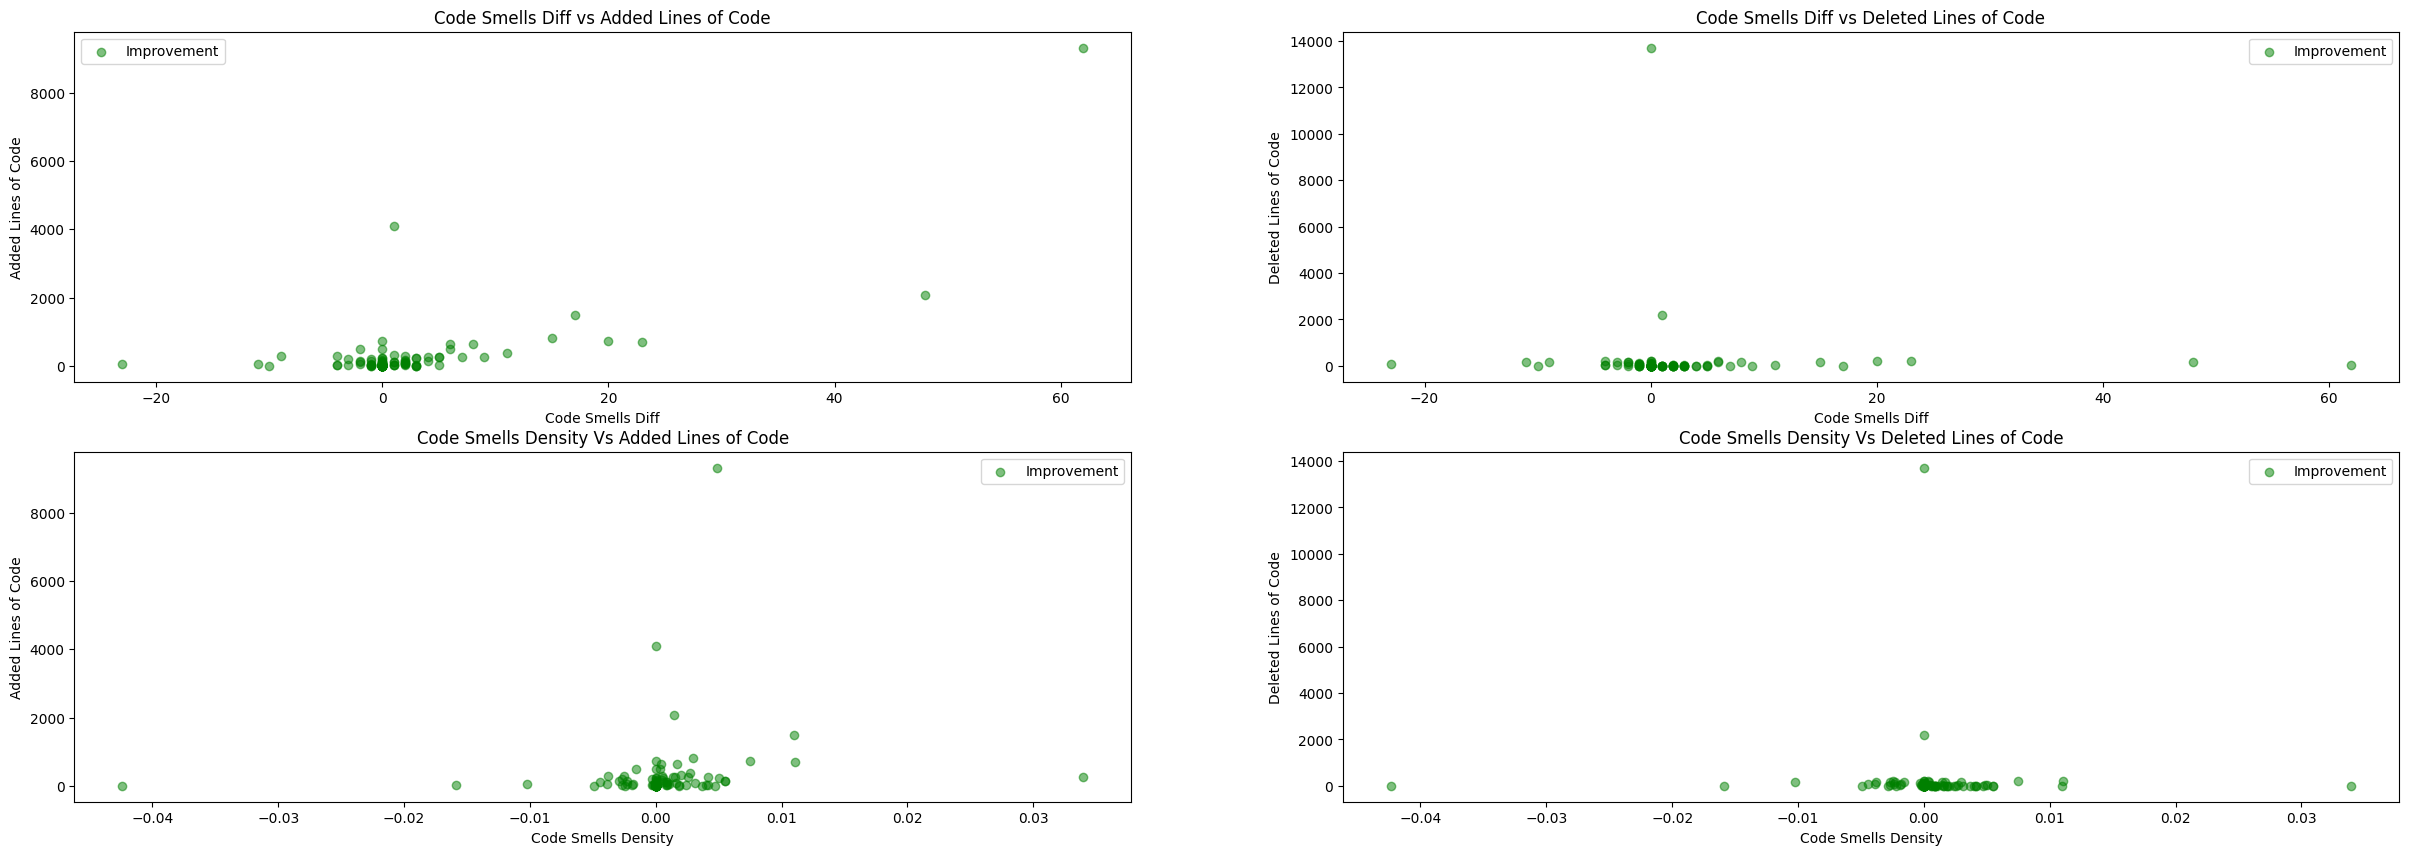

In [81]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


#ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

#ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

#ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

#ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
#ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()

## Test

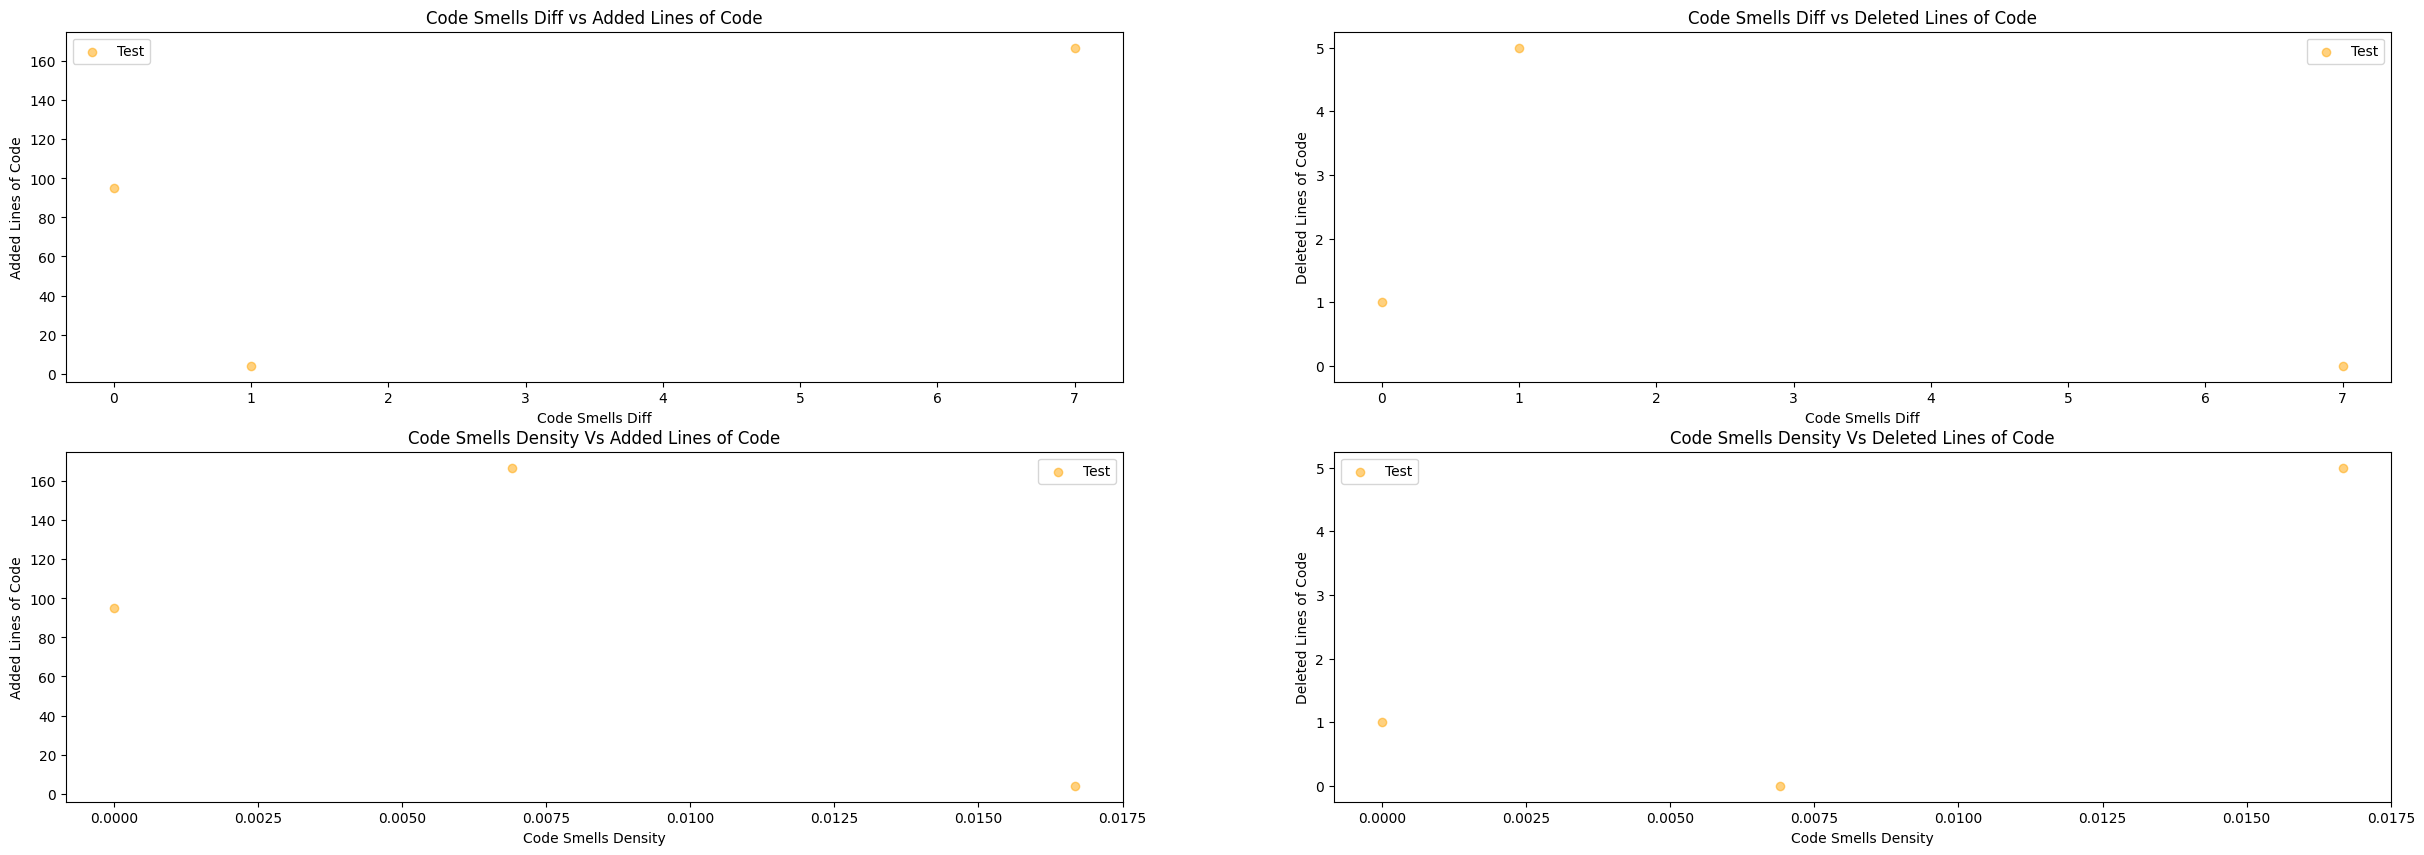

In [82]:
#Draw a scatter plot for code smells diff and code smells density
plt.rcParams['figure.figsize'] = [30, 10]

# Create a figure and axis object 
#fig, ax = plt.subplots()

#create 4 sub plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


#ax1.scatter(code_smells_diff_feature, added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax1.scatter(code_smells_diff_bug, added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax1.scatter(code_smells_diff_improvement, added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax1.scatter(code_smells_diff_test, added_lines_test, c='orange', alpha=0.5, label='Test')

#ax2.scatter(code_smells_diff_feature, deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax2.scatter(code_smells_diff_bug, deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax2.scatter(code_smells_diff_improvement, deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax2.scatter(code_smells_diff_test, deleted_lines_test, c='orange', alpha=0.5, label='Test')

#ax3.scatter(code_smells_density_feature.apply(lambda x: float(x)), added_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax3.scatter(code_smells_density_bug.apply(lambda x: float(x)), added_lines_bug, c='red', alpha=0.5, label='Bug')
#ax3.scatter(code_smells_density_improvement.apply(lambda x: float(x)), added_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax3.scatter(code_smells_density_test.apply(lambda x: float(x)), added_lines_test, c='orange', alpha=0.5, label='Test')

#ax4.scatter(code_smells_density_feature.apply(lambda x: float(x)), deleted_lines_feature, c='blue', alpha=0.5, label='New Feature')
#ax4.scatter(code_smells_density_bug.apply(lambda x: float(x)), deleted_lines_bug, c='red', alpha=0.5, label='Bug')
#ax4.scatter(code_smells_density_improvement.apply(lambda x: float(x)), deleted_lines_improvement, c='green', alpha=0.5, label='Improvement')
ax4.scatter(code_smells_density_test.apply(lambda x: float(x)), deleted_lines_test, c='orange', alpha=0.5, label='Test')

# Add a legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


# Add axis labels and a title
ax1.set_xlabel('Code Smells Diff')
ax1.set_ylabel('Added Lines of Code')

ax2.set_xlabel('Code Smells Diff')
ax2.set_ylabel('Deleted Lines of Code')

ax3.set_xlabel('Code Smells Density')
ax3.set_ylabel('Added Lines of Code')

ax4.set_xlabel('Code Smells Density')
ax4.set_ylabel('Deleted Lines of Code')

ax1.set_title('Code Smells Diff vs Added Lines of Code')
ax2.set_title('Code Smells Diff vs Deleted Lines of Code')
ax3.set_title('Code Smells Density Vs Added Lines of Code')
ax4.set_title('Code Smells Density Vs Deleted Lines of Code')

# Display the graph
plt.show()